In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import skimage

In [3]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def plt_show(name,img1,img2):
    plt.figure(figsize = (20,20))
    plt.subplot(121);plt.imshow(img1,cmap='gray');plt.title(name)
    plt.subplot(122);plt.imshow(img2,cmap='gray');plt.title('Oringal')
    plt.show()

## Search for lines

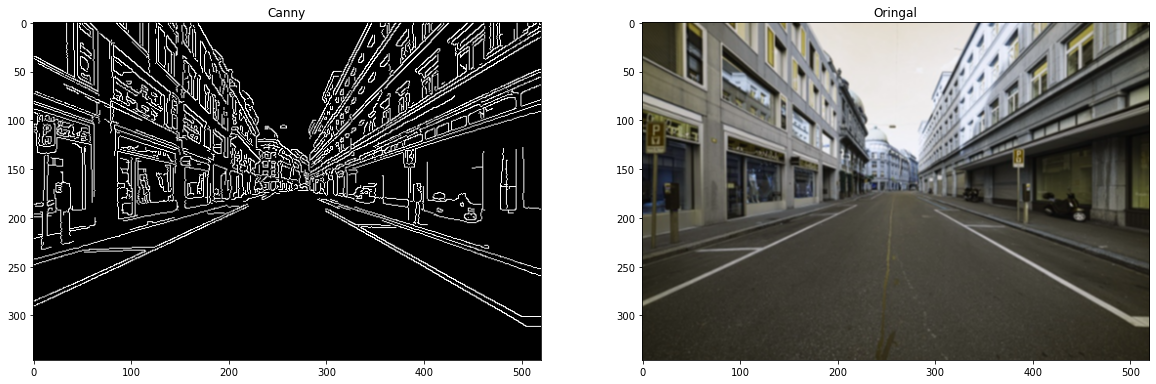

In [4]:
# find the edge of the image
fn = "street.jpg"
gray = cv2.imread(fn,cv2.COLOR_BGR2GRAY)
img = cv2.resize(gray,None,fx=0.8, fy=0.8, interpolation = cv2.INTER_CUBIC)
I = cv2.GaussianBlur(img,(3,3),0)
Iedge = cv2 . Canny (I , 50 , 200 , None , 3)
plt_show("Canny",Iedge,I);

In [31]:
Iedge

array([[  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

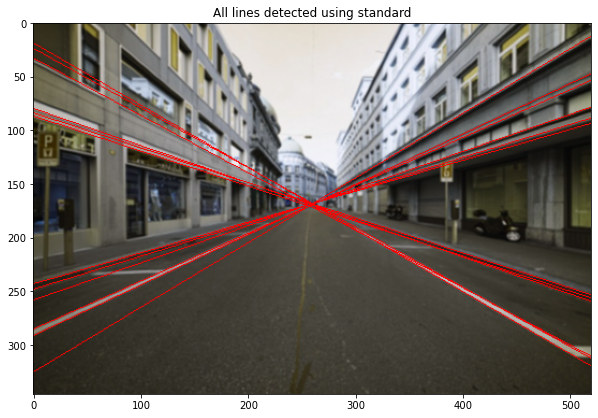

Line num:  12


In [5]:
def line_detection(image,original):
    #Find all the lines
    lines = cv2.HoughLines(Iedge,1,np.pi/180,200)
    all_lines = original.copy()


    for line in lines:
        rho = line[0][0]
        theta = line[0][1]
        # if the line is vertical
        if  (theta < (np.pi/4. )) or (theta > (3.*np.pi/4.0)):
            pt1 = (int(rho/np.cos(theta)),0)             
            pt2 = (int((rho-all_lines.shape[0]*np.sin(theta))/np.cos(theta)),all_lines.shape[0])
            cv2.line( all_lines, pt1, pt2, (255))          
        # if the line is parallel
        else:                      
            pt1 = (0,int(rho/np.sin(theta)))
            pt2 = (all_lines.shape[1], int((rho-all_lines.shape[1]*np.cos(theta))/np.sin(theta)))
            cv2.line(all_lines, pt1, pt2, (255), 1)

    plt.figure(figsize=(10,10));plt.imshow(all_lines);plt.title("All lines detected using standard");
    plt.show()
    print("Line num: ",len(lines))

line_detection(Iedge,I)

In [5]:
image = Iedge
original = I

lines = cv2.HoughLines(Iedge,1,np.pi/180,200)
all_lines = original.copy()

for line in lines:
    rho = line[0][0]
    theta = line[0][1]
    # if the line is vertical
    if  (theta < (np.pi/4. )) or (theta > (3.*np.pi/4.0)):
        pt1 = (int(rho/np.cos(theta)),0)             
        pt2 = (int((rho-all_lines.shape[0]*np.sin(theta))/np.cos(theta)),all_lines.shape[0])
        cv2.line( all_lines, pt1, pt2, (255))          
    # if the line is parallel
    else:                      
        pt1 = (0,int(rho/np.sin(theta)))
        pt2 = (all_lines.shape[1], int((rho-all_lines.shape[1]*np.cos(theta))/np.sin(theta)))
        cv2.line(all_lines, pt1, pt2, (255), 1)

plt.figure(figsize=(10,10));plt.imshow(all_lines);plt.title("All lines detected using standard");
plt.show()
print("Line num: ",len(lines))

NameError: name 'Iedge' is not defined

In [14]:
lines[0][0]

array([21.       ,  2.0769417], dtype=float32)

In [6]:
def line_detection(image,original,name,threshold):
    # Find the max and min length of the lines
    minLength = math.inf
    maxLength = 0
    x_max1,x_min1,y_max1,y_min1 = 0,0,0,0
    x_max2,x_min2,y_max2,y_min2 = 0,0,0,0
    
    all_lines = original.copy()
    lines = cv2.HoughLinesP(image, 1, np.pi/180, threshold, minLineLength=20, maxLineGap=1)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = pow(pow(x2-x1,2)+pow(y2-y1,2),0.5)
        if length > maxLength:
            maxLength = length;
            x_max1,x_max2,y_max1,y_max2 = x1,x2,y1,y2
        elif minLength > length:
            minLength = length;
            x_min1,x_min2,y_min1,y_min2 = x1,x2,y1,y2
        else:
            cv2.line(all_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)
    # print the max and min length line
    cv2.line(all_lines, (x_max1, y_max1), (x_max2, y_max2), (255, 0, 0), 2)
    cv2.line(all_lines, (x_min1, y_min1), (x_min2, y_min2), (0, 255, 0), 2)
    
    all_lines = np.flip(all_lines,1)
    plt.figure(figsize=(10,10));plt.imshow(all_lines);plt.title(name);plt.show()
    print("Line num: ",len(lines))
    print("Max Length: ",maxLength)
    print("Min Length: ",minLength)

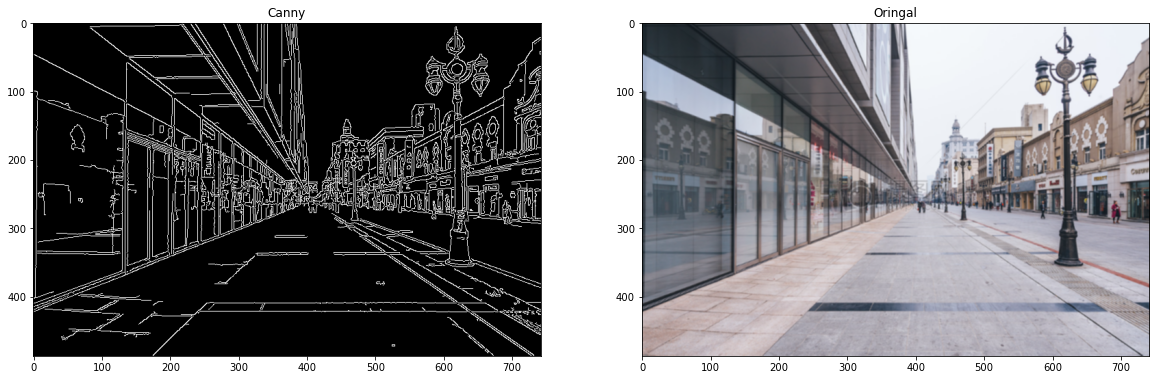

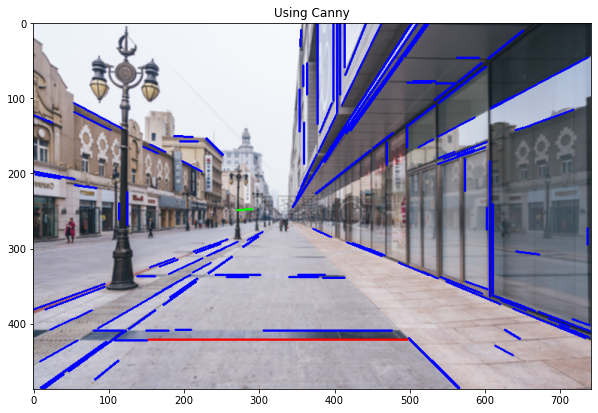

Line num:  136
Max Length:  345.0
Min Length:  20.024984394500787


In [20]:
# find the edge of the image
fn = "street2.png"
gray = cv2.imread(fn,cv2.COLOR_BGR2GRAY)
gray = np.flip(gray,2)
img = cv2.resize(gray,None,fx=0.8, fy=0.8, interpolation = cv2.INTER_CUBIC)
I = cv2.GaussianBlur(img,(3,3),0)
Iedge = cv2 . Canny (I , 50 , 200 , None , 3)
plt_show("Canny",Iedge,I);

line_detection(Iedge,I,"Using Canny",100)

## Search for circles

Find circles:  106


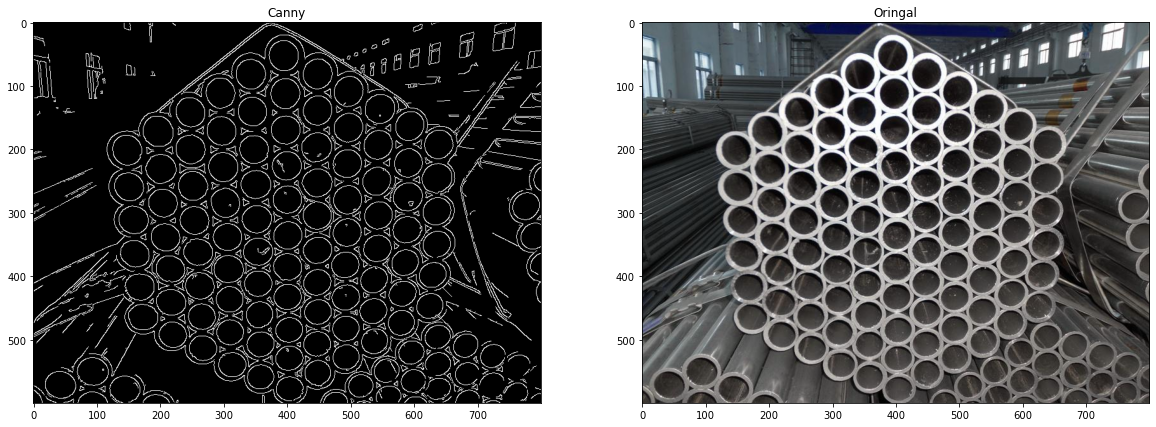

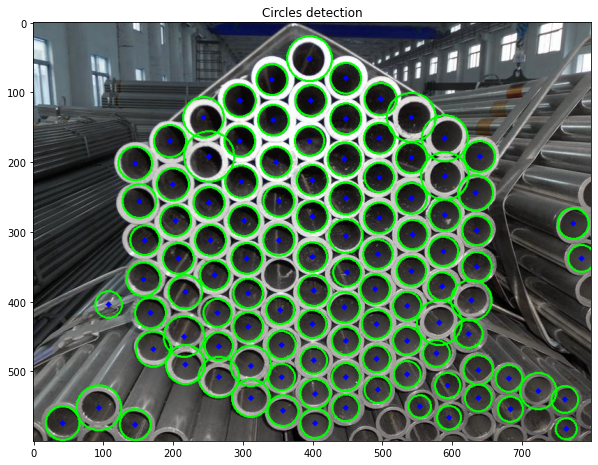

In [38]:
import cv2 as cv
import numpy as np

temp = cv.imread("pipe.jpg")
planets = temp.copy()
gay_img =cv.cvtColor(planets,cv.COLOR_BGRA2GRAY)
img  = cv.medianBlur(gay_img, 7)  #进行中值模糊，去噪点
cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=0, maxRadius=50)
circles = np.uint16(np.around(circles))
print("Find circles: ",len(circles[0]))

edge = cv2 . Canny ( temp, 200 , 400 , None , 3)
plt_show("Canny",edge,temp);

for i in circles[0,:]: #遍历矩阵每一行的数据
    cv.circle(planets, (i[0],i[1]),i[2],(0,255,0) ,2)
    cv.circle(planets, (i[0], i[1]),2, (0,0,255) ,3)         
plt.figure(figsize=(10,10));plt.imshow(planets);plt.title("Circles detection");plt.show()

In [88]:
circles

array([[[514, 234,  71],
        [324, 370,  72],
        [304,  80,  68],
        [332, 224,  62],
        [482,  80,  73],
        [142,  78,  70],
        [134, 226,  65],
        [ 74, 380,  41],
        [506, 388,  37]]], dtype=uint16)

## Optional Work

In [33]:
fn = "street.jpg"
# 1.convert the image into grasyscale
gray = cv2.imread(fn,cv2.COLOR_BGR2GRAY)
gray = np.flip(gray,2)
img = cv2.resize(gray,None,fx=0.8, fy=0.8, interpolation = cv2.INTER_CUBIC)
I = cv2.GaussianBlur(img,(3,3),0)

# 2.find the edge of the image
Iedge = cv2 . Canny (I , 50 , 200 , None , 3)

# 3.create the range of the rho and sita
# rho: the distance from origin point to the line
# sita: the angle from origin point to the line


# 4.decide the size of hough

# 5.vote

# 6.find the max value


## 霍夫变换实现圆形的检测

In [40]:
class Canny:

    def __init__(self, Guassian_kernal_size, img, HT_high_threshold, HT_low_threshold):
        '''
        初始化canny类
        :param Guassian_kernal_size: 高斯滤波器尺寸
        :param img: 输入的图片，在算法过程中改变
        :param HT_high_threshold: 滞后阈值法中的高阈值
        :param HT_low_threshold: 滞后阈值法中的低阈值
        '''
        self.Guassian_kernal_size = Guassian_kernal_size
        self.img = img
        self.HT_high_threshold = HT_high_threshold
        self.HT_low_threshold = HT_low_threshold
        self.y, self.x = img.shape[0:2]
        self.sobelX = np.array([[-1,0,1]])    # x方向检测算子
        self.sobelY = np.array([[-1],[0],[1]])    # y方向检测算子
        self.angle = np.zeros([self.y, self.x])
        pass

    def Get_gradient_img(self):
        '''
        计算梯度图和梯度方向矩阵。
        :return: 生成的梯度图
        '''
        print("Get_gradient_img")

        DerivativeImg_X = np.zeros([self.y, self.x], dtype=np.float)
        DerivativeImg_Y = np.zeros([self.y, self.x], dtype=np.float)
        for i in range(0, self.y):
            for j in range(0, self.x):
                if i == 0 or j == 0 or i == (self.y - 1) or j == (self.x - 1):
                    DerivativeImg_X[i][j] = 0
                else:
                    DerivativeImg_X[i][j] = np.sum(self.sobelX * self.img[i:i + 1, j - 1:j + 2])
                    DerivativeImg_Y[i][j] = np.sum(self.sobelY * self.img[i - 1:i + 2, j:j + 1])
        
        gradient_img, self.angle = cv2.cartToPolar(DerivativeImg_X, DerivativeImg_Y)
        self.angle = np.tan(self.angle)
        self.img = gradient_img.astype(np.uint8)

        return self.img

    def Non_maximum_suppression (self):
        '''
        对生成的梯度图进行非极大化抑制，将tan值的大小与正负结合，确定离散中梯度的方向。
        :return: 生成的非极大化抑制结果图
        '''
        print("Non_maximum_suppression")

        result_img = np.zeros([self.y, self.x])
        for i in range(1, self.y - 1):
            for j in range(1, self.x - 1):
                if abs(self.img[i][j]) <= 5:
                    result_img[i][j] = 0
                    continue
                # __ g2 __
                #    C
                # __ g4 __
                elif abs(self.angle[i][j] > 1):
                    gradient2 = self.img[i - 1][j]
                    gradient4 = self.img[i + 1][j]
                    # g1 g2
                    #    C
                    #    g4 g3
                    if self.angle[i][j] > 0:
                        gradient1 = self.img[i - 1][j - 1]
                        gradient3 = self.img[i + 1][j + 1]
                    #    g2 g1
                    #    C
                    # g3 g4    
                    else:
                        gradient1 = self.img[i - 1][j + 1]
                        gradient3 = self.img[i + 1][j - 1]
                # __   __
                # g2 C g4
                # __   __
                else:
                    gradient2 = self.img[i][j - 1]
                    gradient4 = self.img[i][j + 1]
                    # g1
                    # g2 C g4
                    #      g3
                    if self.angle[i][j] > 0:
                        gradient1 = self.img[i - 1][j - 1]
                        gradient3 = self.img[i + 1][j + 1]
                    #      g3
                    # g2 C g4
                    # g1
                    else:
                        gradient1 = self.img[i + 1][j - 1]
                        gradient3 = self.img[i - 1][j + 1]

                temp1 = abs(self.angle[i][j]) * gradient1 + (1 - abs(self.angle[i][j])) * gradient2
                temp2 = abs(self.angle[i][j]) * gradient3 + (1 - abs(self.angle[i][j])) * gradient4
                if self.img[i][j] >= temp1 and self.img[i][j] >= temp2:
                    # 此处的 +50 是将像素值拉高50，为了观察结果方便，后面的双阈值也应该相应的拉高50
                    result_img[i][j] = self.img[i][j] + 50	
                else:
                    result_img[i][j] = 0
        self.img = result_img.astype(np.uint8)
        
        return self.img

    def Hysteresis_thresholding(self):
        '''
        对生成的非极大化抑制结果图进行滞后阈值法，用强边延伸弱边，这里的延伸方向为梯度的垂直方向，
        将比低阈值大比高阈值小的点置为高阈值大小，方向在离散点上的确定与非极大化抑制相似。
        :return: 滞后阈值法结果图
        '''
        print("Hysteresis_thresholding")

        result_Img = self.img.copy()
        for i in range(1, self.y - 1):
            for j in range(1, self.x - 1):
                if self.img[i][j] < self.HT_low_threshold:
                    result_Img[i][j] = 0
                elif self.img[i][j] < self.HT_high_threshold:
                    if (self.img[i - 1][j - 1] >= self.HT_high_threshold or 
                        self.img[i - 1][j] >= self.HT_high_threshold or 
                        self.img[i - 1][j + 1] >= self.HT_high_threshold or 
                        self.img[i][j - 1] >= self.HT_high_threshold or 
                        self.img[i][j + 1] >= self.HT_high_threshold or 
                        self.img[i + 1][j - 1] >= self.HT_high_threshold or 
                        self.img[i + 1][j] >= self.HT_high_threshold or 
                        self.img[i + 1][j + 1] >= self.HT_high_threshold):
                        result_Img[i][j] = 255 
                    else:
                        result_Img[i][j] = 0
                else:
                    result_Img[i][j] = 255
                self.img = result_Img            

        return self.img

    def canny_algorithm(self):
        '''
        按照顺序和步骤调用以上所有成员函数。
        :return: Canny 算法的结果
        '''
        self.img = cv2.GaussianBlur(self.img, (self.Guassian_kernal_size, self.Guassian_kernal_size), 0)
        self.Get_gradient_img()
        self.Non_maximum_suppression()
        self.Hysteresis_thresholding()
        pass

In [64]:
'''
在实现Canny算法的基础上
需要Canny算法得到的梯度矩阵与边缘检测结果图
'''
import numpy as np
import math

class Hough_transform:
    def __init__(self, img, angle, Hough_transform_MinDis, Hough_transform_step, Hough_transform_threshold):
        '''
        :param img: 输入的图像
        :param angle: 输入的梯度方向矩阵
        :param Hough_transform_MinDis: 两个圆心之间的最小距离
        :param Hough_transform_step: Hough变换步长大小
        :param Hough_transform_threshold: 筛选单元的阈值
        '''

        self.img = img
        self.angle = angle
        self.y, self.x = img.shape[0:2]
        self.radius = math.ceil(math.sqrt(self.y**2 + self.x**2))   #图像对角线长度，圆直径的最大长度
        self.Hough_transform_MinDis = Hough_transform_MinDis
        self.Hough_transform_step = Hough_transform_step
        self.vote_matrix = np.zeros([math.ceil(self.y / self.Hough_transform_step), math.ceil(self.x / self.Hough_transform_step), math.ceil(self.radius / self.Hough_transform_step)])
        self.Hough_transform_threshold = Hough_transform_threshold
        self.circles = []

    def Hough_transform_algorithm(self):
        '''
        按照 x,y,radius 建立三维空间，根据图片中边上的点沿梯度方向对空间中的所有单
        元进行投票。每个点投出来结果为一折线。
        :return:  投票矩阵
        '''
        print ('Hough_transform_algorithm')

        for i in range(1, self.y - 1):
            for j in range(1, self.x - 1):
                if self.img[i][j] > 0:
                    x = j
                    y = i
                    r = 0
                    while x > 0 and y > 0 and x < self.x and y < self.y:
                        self.vote_matrix[math.floor(y / self.Hough_transform_step)][math.floor(x / self.Hough_transform_step)][math.floor(r / self.Hough_transform_step)] += 1
                        x = x + self.Hough_transform_step
                        y = y + self.angle[i][j] * self.Hough_transform_step
                        r = r + math.sqrt(self.Hough_transform_step ** 2 + (self.angle[i][j] * self.Hough_transform_step) ** 2)
                    x = j - self.Hough_transform_step
                    y = i - self.angle[i][j] * self.Hough_transform_step
                    r = math.sqrt(self.Hough_transform_step ** 2 + (self.angle[i][j] * self.Hough_transform_step) ** 2)
                    while x > 0 and y > 0 and x < self.x and y < self.y:
                        self.vote_matrix[math.floor(y / self.Hough_transform_step)][math.floor(x / self.Hough_transform_step)][math.floor(r / self.Hough_transform_step)] += 1
                        x = x - self.Hough_transform_step
                        y = y - self.angle[i][j] * self.Hough_transform_step
                        r = r + math.sqrt(self.Hough_transform_step ** 2 + (self.angle[i][j] * self.Hough_transform_step) ** 2)

        print(self.vote_matrix.shape)
        return self.vote_matrix


    def Select_Circle(self):
        '''
        按照阈值从投票矩阵中筛选出合适的圆，并作极大化抑制。
        此处的极大化抑制并非单纯选取极大值作为最终结果，而是将临界点进行平均处理得到结果。
        :return: None
        '''
        print ('Select_Circle')
        
        candidateCircles = []
        for i in range(0, self.vote_matrix.shape[0]):
            for j in range(0, self.vote_matrix.shape[1]):
                for k in range(0, self.vote_matrix.shape[2]):
                    if self.vote_matrix[i][j][k] > self.Hough_transform_threshold:
                        y = i * self.Hough_transform_step + (self.Hough_transform_step / 2)
                        x = j * self.Hough_transform_step + (self.Hough_transform_step / 2)
                        r = k * self.Hough_transform_step + (self.Hough_transform_step / 2)
                        candidateCircles.append([math.ceil(x), math.ceil(y), math.ceil(r)])
        print("候选圆：{}".format(candidateCircles))

        # 将可能的圆归类并做极大化抑制
        x, y, r = candidateCircles[0]
        possibleCircles = []
        middleCircles = []
        for circle in candidateCircles:
            if math.sqrt((x - circle[0])**2 + (y - circle[1])**2) <= self.Hough_transform_MinDis:
                possibleCircles.append([circle[0], circle[1], circle[2]])
            else:
                #.mean(axis=__) 对矩阵数据平均，axis可空，axis=0按列平均、axis=1按行平均
                result = np.array(possibleCircles).mean(axis=0)     
                middleCircles.append([result[0], result[1], result[2]])
                possibleCircles.clear()
                x, y, r = circle
                possibleCircles.append([x, y, r])
        result = np.array(possibleCircles).mean(axis=0)
        middleCircles.append([result[0], result[1], result[2]])

        # 此处是为了将middleCircles内的各项按每项第一个元素大小进行升序排列
        def takeFirst(element):
            return element[0]

        middleCircles.sort(key=takeFirst, reverse=False)
        x, y, r = middleCircles[0]
        possibleCircles = []
        for circle in middleCircles:
            if math.sqrt((x - circle[0])**2 + (y - circle[1])**2) <= self.Hough_transform_MinDis:
                possibleCircles.append([circle[0], circle[1], circle[2]])
            else:
                result = np.array(possibleCircles).mean(axis=0)
                print("Circle core: (%f, %f), Radius: %f" % (result[0], result[1], result[2]))
                self.circles.append([result[0], result[1], result[2]])
                possibleCircles.clear()
                x, y, r = circle
                possibleCircles.append([x, y, r-200])
        result = np.array(possibleCircles).mean(axis=0)
        print("Circle core: (%f, %f), Radius: %f" % (result[0], result[1], result[2]))
        self.circles.append([result[0], result[1], result[2]])
        return self.circles

    def Calculate(self):
        '''
        按照算法顺序调用以上成员函数
        :return: 圆形拟合结果图，圆的坐标及半径集合
        '''
        self.Hough_transform_algorithm()
        self.Select_Circle()
        return self.circles


Get_gradient_img


D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Non_maximum_suppression
Hysteresis_thresholding


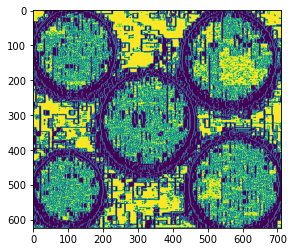

In [62]:
canny = Canny(3,cv2.imread('coins.png'),1,1)
canny.canny_algorithm()
plt.imshow(canny.img)

Hough_transform_algorithm
(3, 3, 4)
Select_Circle
候选圆：[[125, 125, 125], [125, 125, 375], [125, 125, 625], [375, 125, 125], [375, 125, 375], [625, 125, 125], [625, 125, 375], [625, 125, 625], [125, 375, 125], [125, 375, 375], [125, 375, 625], [375, 375, 125], [375, 375, 375], [625, 375, 125], [625, 375, 375], [625, 375, 625], [125, 625, 125], [125, 625, 375], [125, 625, 625], [375, 625, 125], [375, 625, 375], [625, 625, 125], [625, 625, 375], [625, 625, 625]]
Circle core: (125.000000, 125.000000), Radius: 375.000000
Circle core: (125.000000, 375.000000), Radius: 175.000000
Circle core: (125.000000, 625.000000), Radius: 175.000000
Circle core: (375.000000, 125.000000), Radius: 50.000000
Circle core: (375.000000, 375.000000), Radius: 50.000000
Circle core: (375.000000, 625.000000), Radius: 50.000000
Circle core: (625.000000, 125.000000), Radius: 175.000000
Circle core: (625.000000, 375.000000), Radius: 175.000000
Circle core: (625.000000, 625.000000), Radius: 175.000000


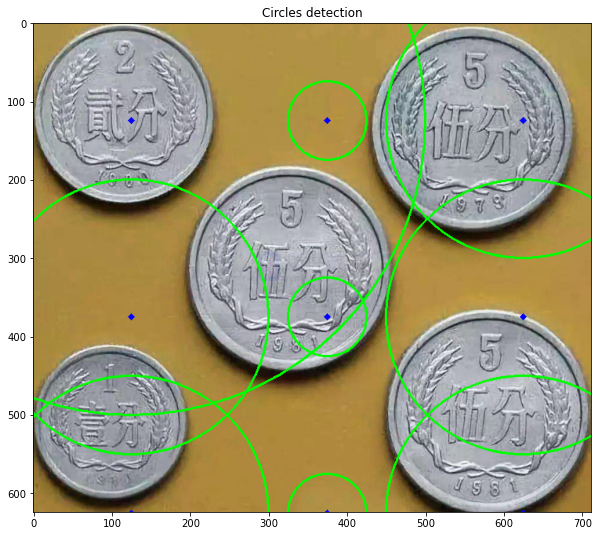

In [65]:
hough = Hough_transform(canny.img,canny.angle,10,250,50)
hough.Calculate()
temp = cv2.imread('coins.png')
for i in hough.circles: #遍历矩阵每一行的数据
    cv.circle(temp, (int(i[0]),int(i[1])),int(i[2]),(0,255,0) ,2)
    cv.circle(temp, (int(i[0]), int(i[1])),2, (0,0,255) ,3)         
plt.figure(figsize=(10,10));plt.imshow(temp);plt.title("Circles detection");plt.show()

In [123]:
circles

array([[[514, 234,  71],
        [324, 370,  72],
        [304,  80,  68],
        [332, 224,  62],
        [482,  80,  73],
        [142,  78,  70],
        [134, 226,  65],
        [ 74, 380,  41],
        [506, 388,  37]]], dtype=uint16)